In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

#from astroquery.esasky import ESASky
#from astroquery.utils import TableList
from astropy.wcs import WCS
#from reproject import reproject_interp

In [ ]:
#S1 = data_mom0[965   :1005 ,1000 :1060] #S1 dims
#S2 = data_mom0[1080  :1140 ,1070 :1130]
#S3 = data_mom0[965   :1065 ,970  :1070] #S3 dims
#S4 = data_mom0[907   :961  ,1211 :1270]
#S5 = data_mom0[1100  :1140 ,890  :940]
#S6 = data_mom0[1130  :1180 ,1065 :1100]
#S7 = data_mom0[1005  :1045 ,970  :1000]
#S9 = data_mom0[846   :851  ,1247 :1255]
#S10 = data_mom0[830  :880  ,1100 :1150]
#N1 = data_mom0[1370  :1500 ,1160 :1230]
#N2 = data_mom0[550  :750   ,450  :650]
#N3 = data_mom0[530  :570   ,1010 :1060]
#N4 = data_mom0[1970 :2020  ,580  :630]
#N5 = data_mom0[150  :190   ,800  :850]
#N6 = data_mom0[0    :40    ,2000 :2048]
#N7 = data_mom0[900  :950   ,410  :450]
#N8 = data_mom0[1345 :1365  ,1760 :1785]
#N9 = data_mom0[1268 :1290  ,1138 :1166]

#S7 =   [115, 155, 20,  50] 

if i >= 3 and j < 2 and i < 4 and j >= 1:
            S9_mom0[j,i] = S9_copy[j-1,i-3]

In [2]:
loc = 'data/'
vers = 'pbcorr' 
name= '_J1059_09_HI.image'
fullname = loc+vers+name
ext = '.fits'
image = '_S3'
mom0 = '_mom0_S3'
mom1 = '_mom1_S3'
anom3= '_mom0_S3.gauss_model_anom'
image1= '_S1'
mom01= '_mom0_S1'
mom11= '_mom1_S1'
anom1= '_mom0_S1.gauss_model_anom'
image2= '_S2'
mom02= '_mom0_S2'
mom12= '_mom1_S2'
anom2= '_mom0_S2.gauss_model_anom'
image3= '_S1237'
mom03= '_mom0_S1237'
mom13= '_mom1_S1237'
imageb = '_bridge'
mom0b = '_mom0_bridge'
mom1b = '_mom1_bridge'
imagec = '_cloud'
mom0c = '_mom0_cloud'
mom1c = '_mom1_cloud'
outloc = loc+vers+name
S1model = 'output/J1059-09_S1_fixed/J1059-09mod_local.fits'
S3model = 'output/J1059-09_S3_fixed/J1059-09mod_local.fits'
S2model = 'output/J1059-09_S2/J1059-09mod_local.fits'
fullmodel = 'output/J1059-09_S1237_fixed/J1059-09mod_local.fits'

In [4]:
hdu_list = fits.open(fullname+image+ext)
hdu_list.info()
hdu0_list = fits.open(fullname+image1+ext)
hdu0_list.info()
hdu1_list = fits.open(fullname+image2+ext)
hdu1_list.info()
hdu3_list = fits.open(fullname+image3+ext)
hdu3_list.info()

data_image_S3 = fits.getdata(fullname+image+ext)
header_image_S3 = fits.getheader(fullname+image+ext)
data_mom1_S3 = fits.getdata(fullname+mom1+ext)
header_mom1_S3 = fits.getheader(fullname+mom1+ext)
data_mom0_S3 = fits.getdata(fullname+mom0+ext)
header_mom0_S3 = fits.getheader(fullname+mom0+ext)
data_anom_S3 = fits.getdata(fullname+anom3+ext)
header_anom_S3 = fits.getheader(fullname+anom3+ext)

data_image_S1 = fits.getdata(fullname+image1+ext)
header_image_S1 = fits.getheader(fullname+image1+ext)
data_mom1_S1 = fits.getdata(fullname+mom11+ext)
header_mom1_S1 = fits.getheader(fullname+mom11+ext)
data_mom0_S1 = fits.getdata(fullname+mom01+ext)
header_mom0_S1 = fits.getheader(fullname+mom01+ext)
data_anom_S1 = fits.getdata(fullname+anom1+ext)
header_anom_S1 = fits.getheader(fullname+anom1+ext)

data_image_S2 = fits.getdata(fullname+image2+ext)
header_image_S2 = fits.getheader(fullname+image2+ext)
data_mom1_S2 = fits.getdata(fullname+mom12+ext)
header_mom1_S2 = fits.getheader(fullname+mom12+ext)
data_mom0_S2 = fits.getdata(fullname+mom02+ext)
header_mom0_S2 = fits.getheader(fullname+mom02+ext)
data_anom_S2 = fits.getdata(fullname+anom2+ext)
header_anom_S2 = fits.getheader(fullname+anom2+ext)

data_image_S1237 = fits.getdata(fullname+image3+ext)
header_image_S1237 = fits.getheader(fullname+image3+ext)
data_mom1_S1237 = fits.getdata(fullname+mom13+ext)
header_mom1_S1237 = fits.getheader(fullname+mom13+ext)
data_mom0_S1237 = fits.getdata(fullname+mom03+ext)
header_mom0_S1237 = fits.getheader(fullname+mom03+ext)

data_image_bridge = fits.getdata(fullname+imageb+ext)
header_image_bridge = fits.getheader(fullname+imageb+ext)
data_mom1_bridge = fits.getdata(fullname+mom1b+ext)
header_mom1_bridge = fits.getheader(fullname+mom1b+ext)
data_mom0_bridge = fits.getdata(fullname+mom0b+ext)
header_mom0_bridge = fits.getheader(fullname+mom0b+ext)

data_image_cloud = fits.getdata(fullname+imagec+ext)
header_image_cloud = fits.getheader(fullname+imagec+ext)
data_mom1_cloud = fits.getdata(fullname+mom1c+ext)
header_mom1_cloud = fits.getheader(fullname+mom1c+ext)
data_mom0_cloud = fits.getdata(fullname+mom0c+ext)
header_mom0_cloud = fits.getheader(fullname+mom0c+ext)

#data_model_S1 = fits.getdata(S1model)
#header_model_S1 = fits.getheader(S1model)
#data_model_S3 = fits.getdata(S3model)
#header_model_S3 = fits.getheader(S3model)
#data_model_S2 = fits.getdata(S2model)
#header_model_S2 = fits.getheader(S2model)
#data_model_full = fits.getdata(fullmodel)
#header_model_full = fits.getheader(fullmodel)
print(type(data_anom_S3))
print(data_anom_S3.shape)

Filename: data/pbcorr_J1059_09_HI.image_S3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     633   (100, 100, 189)   float32   
Filename: data/pbcorr_J1059_09_HI.image_S1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     633   (60, 40, 189)   float32   
Filename: data/pbcorr_J1059_09_HI.image_S2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     633   (60, 60, 189)   float32   
Filename: data/pbcorr_J1059_09_HI.image_S1237.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     633   (200, 250, 189)   float32   
<class 'numpy.ndarray'>
(100, 100)


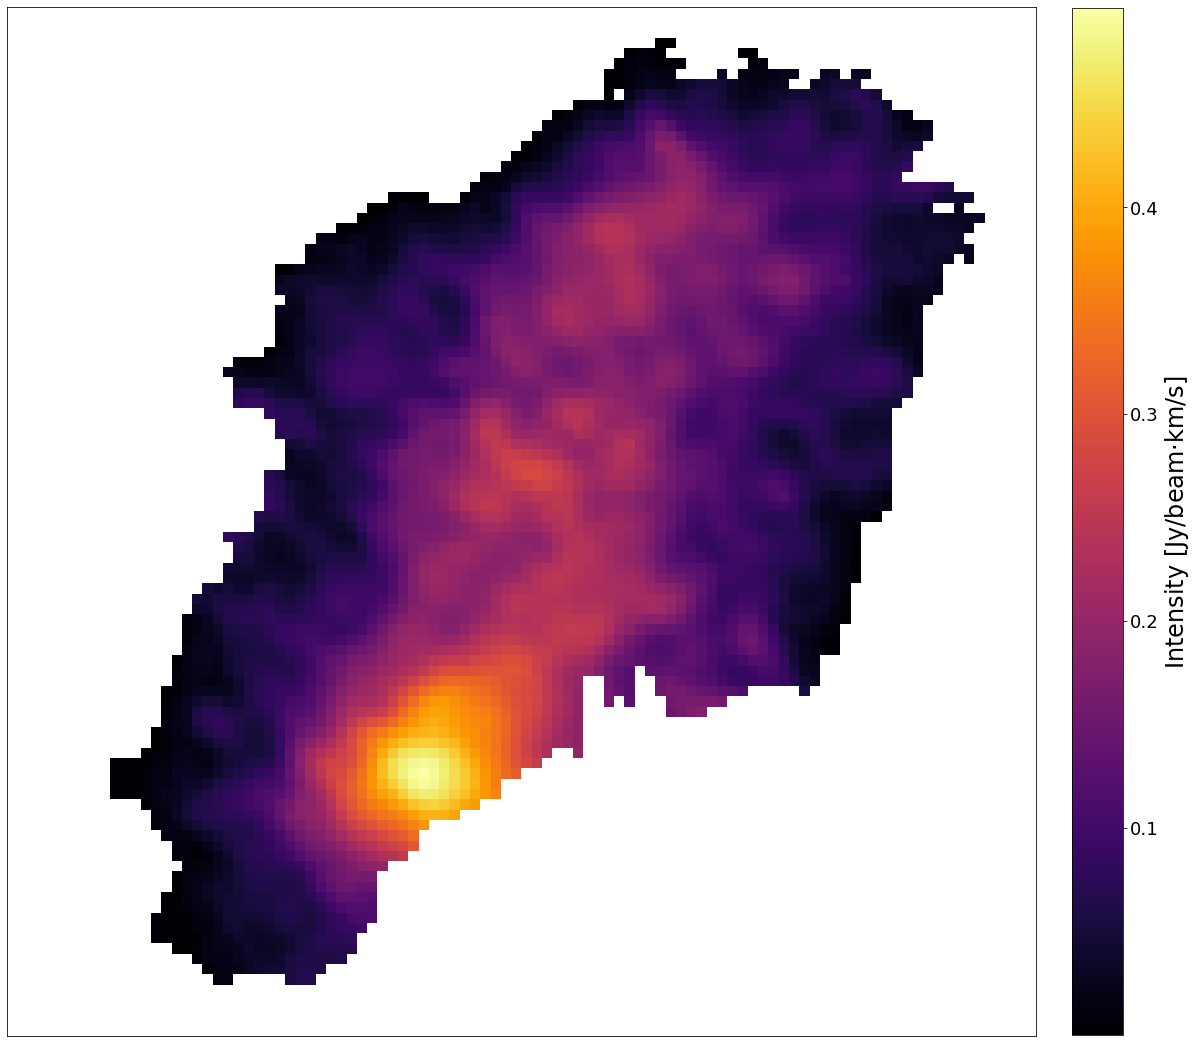

In [9]:
display = np.copy(data_mom0_S3)
for i in range (0,100):
    for j in range(0,100):
        if data_mom0_S3[i,j] == 0:
            display[i,j] = math.nan

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0_S3))
im = ax.imshow(display, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)


lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom0S3.pdf', bbox_inches='tight')

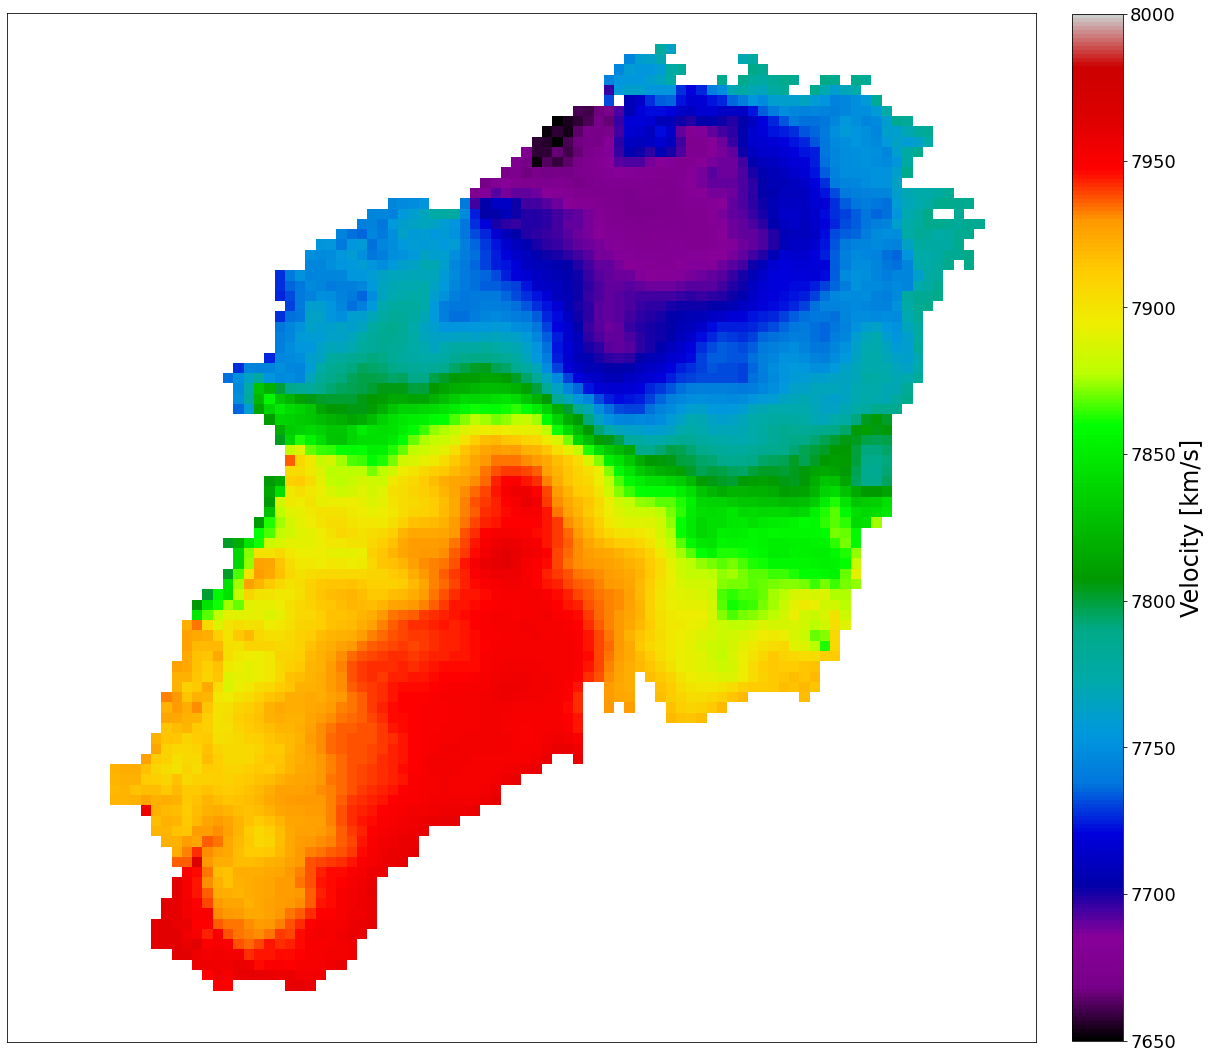

In [13]:
display = np.copy(data_mom1_S3)
for i in range (0,100):
    for j in range(0,100):
        if data_mom0_S3[i,j] == 0:
            display[i,j] = math.nan

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0_S3))
im = ax.imshow(display, cmap='nipy_spectral', vmin = 7650, vmax = 8000)
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Velocity [km/s]", size=24)
cbar.ax.tick_params(labelsize=18)


lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom1S3.pdf', bbox_inches='tight')

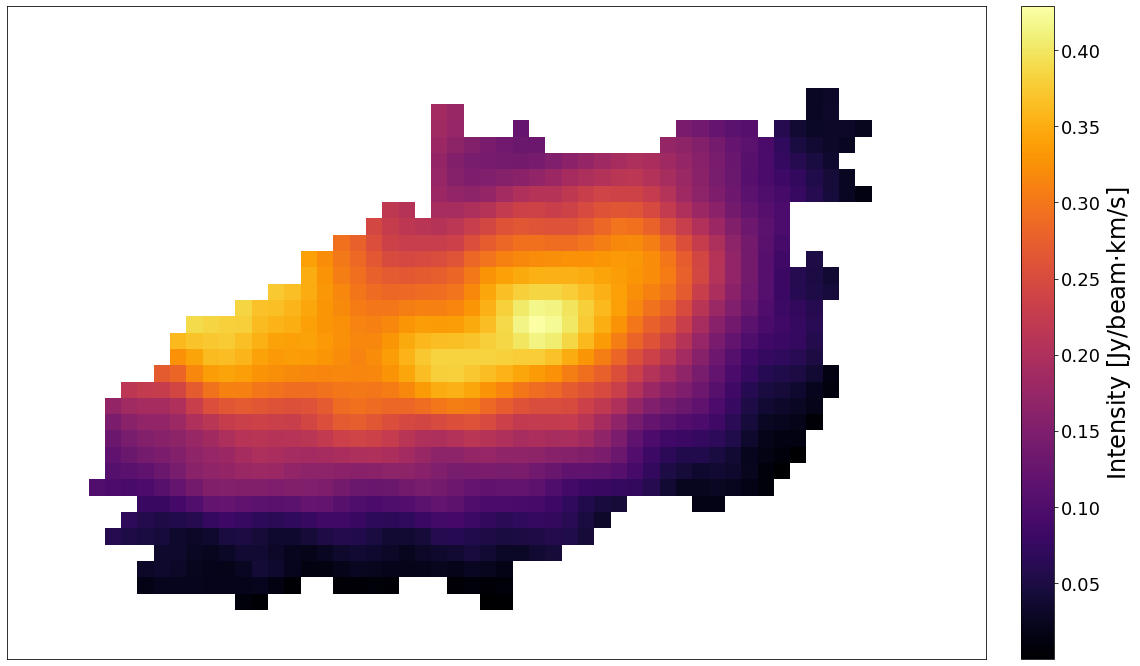

In [28]:
display = np.copy(data_mom0_S1)
for i in range (0,40):
    for j in range(0,60):
        if data_mom0_S1[i,j] == 0:
            display[i,j] = math.nan

fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(projection= WCS(header_mom0_S3))
im = ax.imshow(display, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)


lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom0S1.pdf', bbox_inches='tight')

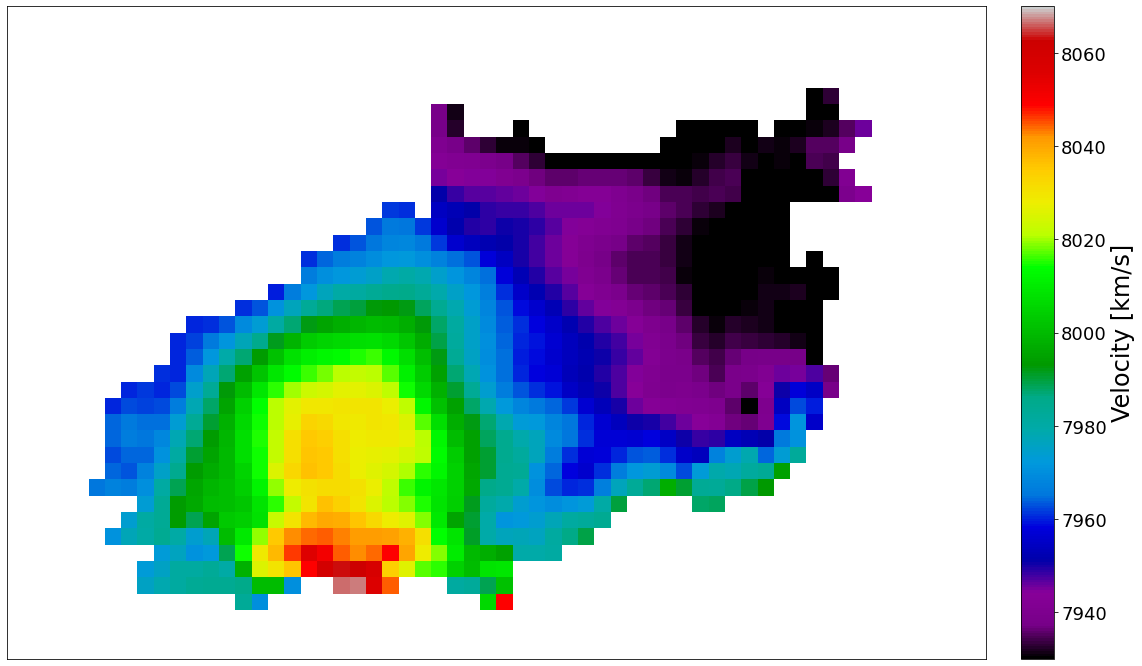

In [29]:
display = np.copy(data_mom1_S1)
for i in range (0,40):
    for j in range(0,60):
        if data_mom0_S1[i,j] == 0:
            display[i,j] = math.nan

fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(projection= WCS(header_mom0_S3))
im = ax.imshow(display, cmap='nipy_spectral', vmin = 7930, vmax = 8070)
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Velocity [km/s]", size=24)
cbar.ax.tick_params(labelsize=18)


lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom1S1.pdf', bbox_inches='tight')

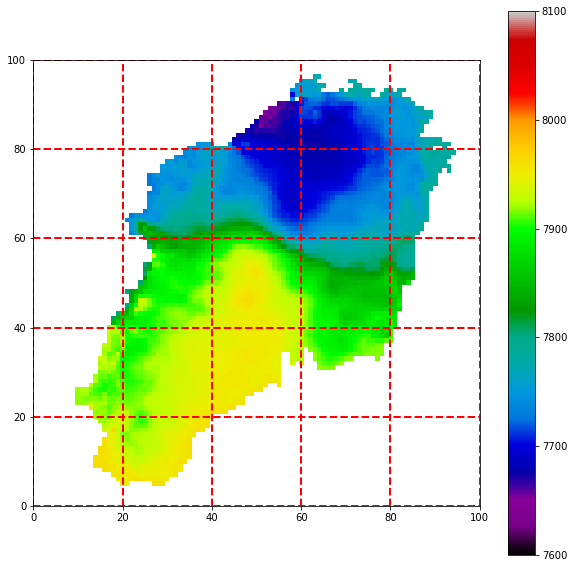

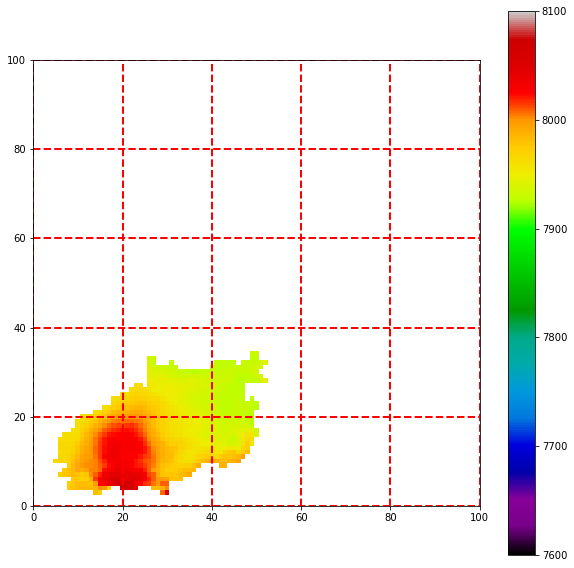

In [4]:
plt.figure(figsize = (10,10))
plt.imshow(data_mom1_S3, cmap='nipy_spectral', vmin=7600, vmax=8100)
plt.colorbar()
plt.ylim(0,100)
plt.xlim(0,100)
plt.grid(color='r', linestyle='--', linewidth=2)

plt.figure(figsize = (10,10))
plt.imshow(data_mom1_S1, cmap='nipy_spectral', vmin=7600, vmax=8100)
plt.colorbar()
plt.ylim(0,100)
plt.xlim(0,100)
plt.grid(color='r', linestyle='--', linewidth=2)

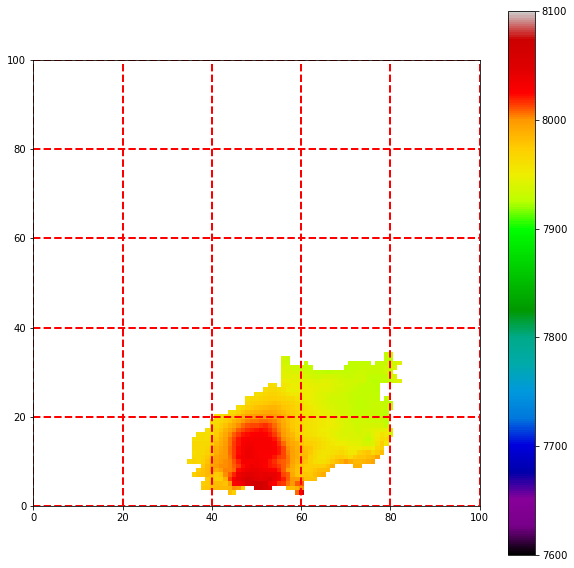

In [43]:
full_mom1 = np.empty_like(data_mom1_S3)
full_mom0 = np.empty_like(data_mom0_S3)
full_cube = np.empty_like(data_image_S3)
full_model = np.empty_like(data_model_S3)
#S13 = data_mom0[965:1005,1000:1060] #S1 dims
#S13 = data_mom0[965:1065,970:1070] #S3 dims
#S3 = [0,100,0,100]
#S1 = [0,40, 30, 90]

for i in range(0,100):
    for j in range(0,100):
        full_mom0[j,i] = 0.0
        full_mom1[j,i] = math.nan
        for k in range(0,189):
            full_cube[k,j,i] = 0.0
            full_model[k,j,i] = 0.0
        if i >= 30 and j < 40 and i < 90 and full_mom0[j,i] == 0.0:
            full_mom0[j,i] = data_mom0_S1[j,i-30]
            full_mom1[j,i] = data_mom1_S1[j,i-30]
            for k in range(0,189):
                full_cube[k,j,i] = data_image_S1[k,j,i-30]
                full_model[k,j,i] = data_model_S1[k,j,i-30]
                    
                
plt.figure(figsize = (10,10))
plt.imshow(full_mom1, cmap='nipy_spectral', vmin=7600, vmax=8100)
plt.colorbar()
plt.ylim(0,100)
plt.xlim(0,100)
plt.grid(color='r', linestyle='--', linewidth=2)   

In [44]:
hdu = fits.PrimaryHDU(full_cube, header=header_model_S3)
hdu.writeto(outloc+image+'_S1_100'+ext, overwrite=True)
hdu = fits.PrimaryHDU(full_mom0, header=header_mom0_S3)
hdu.writeto(outloc+image+'_S1_100_mom0'+ext, overwrite=True)

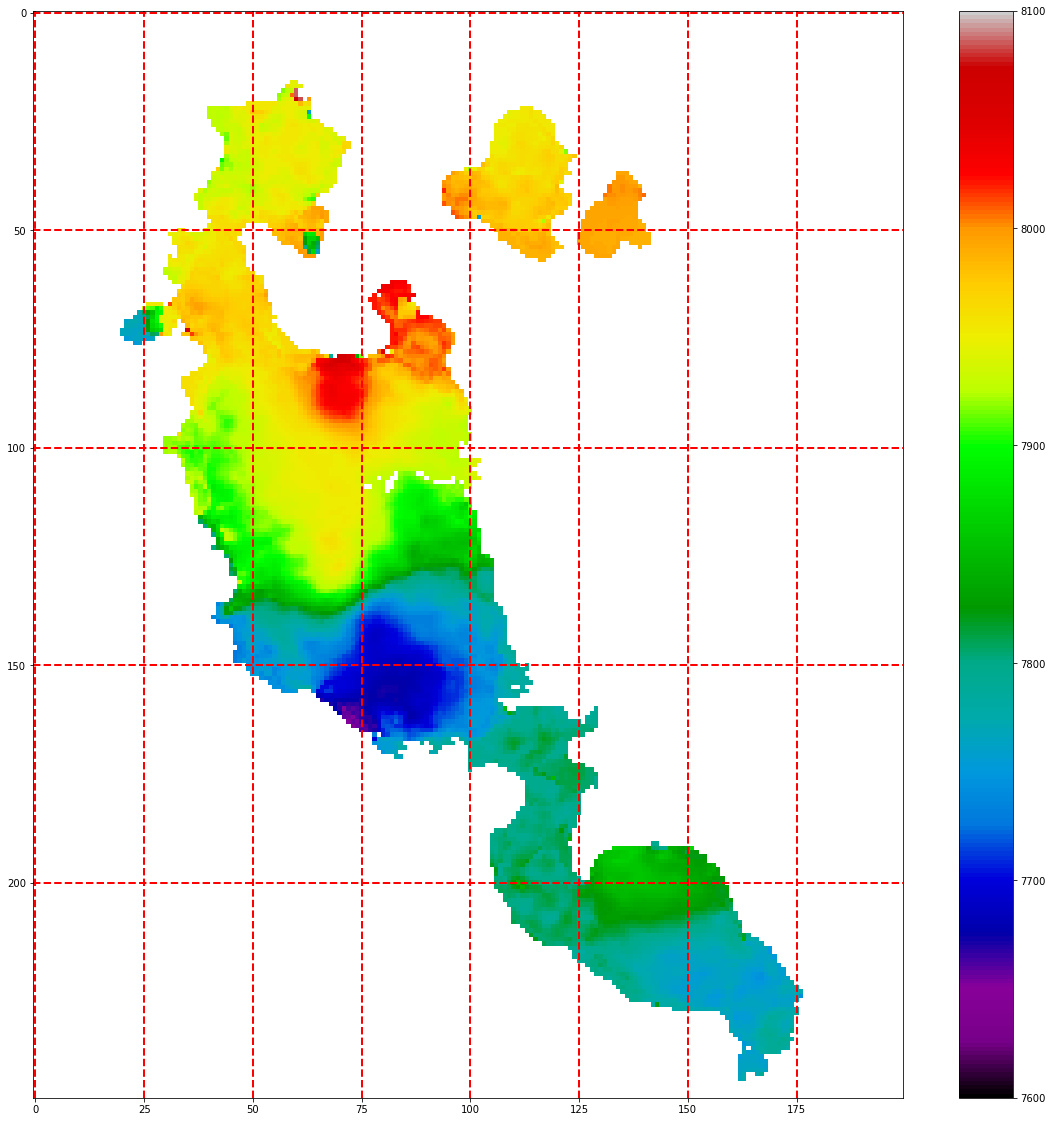

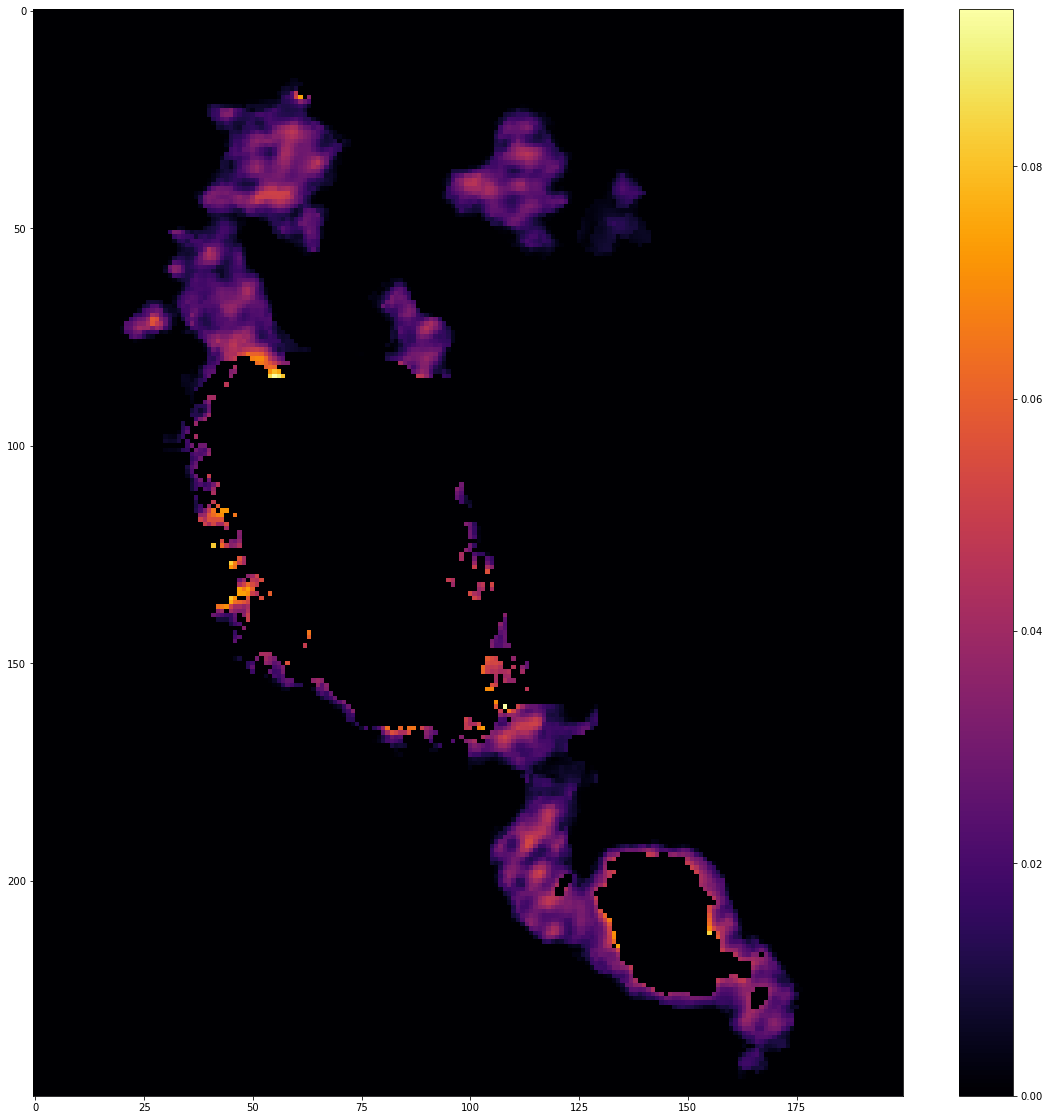

In [60]:
S1_mom1 = np.empty_like(data_mom1_S1237)
S1_mom0 = np.empty_like(data_mom0_S1237)
S1_cube = np.empty_like(data_image_S1237)
S1_model = np.empty_like(data_model_full)
anom_mom0 = np.empty_like(data_mom0_S1237)
#S1237 = data_mom0[890:1140,950:1150]
#S13 = data_mom0[965:1005,1000:1060] #S1 dims
#S13 = data_mom0[965:1065,970:1070] #S3 dims
#S2 = data_mom0[1080:1140,1070:1130]
#cloud = data_mom0[900:1010,960:1100]
#bridge = data_mom0[1050:1110,1050:1080]

#full = [0,250, 0, 200]
#S3 = [75,175,20,120]
#S1 = [75,115, 50, 110]
#S2 = [190, 250, 120, 180]
#cloud = [10, 120, 10, 150]
#bridge = [160, 220, 100, 130]

for i in range(0,200):
    for j in range(0,250): 
        
        S1_mom0[j,i] = 0.0
        S1_mom1[j,i] = math.nan
        anom_mom0[j,i] = 0.0
        for k in range(0,189):
            S1_cube[k,j,i] = 0.0
            S1_model[k,j,i] = 0.0
            
        if i >= 50 and j < 115 and i < 110 and j >= 75:
            S1_mom0[j,i] = data_mom0_S1[j-75,i-50]
            S1_mom1[j,i] = data_mom1_S1[j-75,i-50]
            for k in range(0,189):
                S1_cube[k,j,i] = data_image_S1[k,j-75,i-50]
                S1_model[k,j,i] = data_model_S1[k,j-75,i-50]
                
        if i >= 20 and j < 175 and i < 120 and j >= 75 and S1_mom0[j,i] == 0:
            S1_mom0[j,i] = data_mom0_S3[j-75,i-20]
            S1_mom1[j,i] = data_mom1_S3[j-75,i-20]
            if data_anom_S3[j-75,i-20] != 0:
                anom_mom0[j,i] = data_anom_S3[j-75,i-20]
            if data_anom_S1[j-75,i-20] != 0:
                anom_mom0[j,i] = data_anom_S1[j-75,i-20]
            for k in range(0,189):
                S1_cube[k,j,i] = data_image_S3[k,j-75,i-20]
                S1_model[k,j,i] = data_model_S3[k,j-75,i-20]
                
        if i >= 120 and j < 250 and i < 180 and j>=190 and S1_mom0[j,i] == 0:
            S1_mom0[j,i] = data_mom0_S2[j-190,i-120]
            S1_mom1[j,i] = data_mom1_S2[j-190,i-120]
            if data_anom_S2[j,i] != 0:
                anom_mom0[j,i] = data_anom_S2[j,i]
            for k in range(0,189):
                S1_cube[k,j,i] = data_image_S2[k,j-190,i-120]
                S1_model[k,j,i] = data_model_S2[k,j-190,i-120]
                
        if i >= 10 and j < 90 and i < 150 and j>=10 and S1_mom0[j,i] == 0:
            S1_mom0[j,i] = data_mom0_cloud[j-10,i-10]
            S1_mom1[j,i] = data_mom1_cloud[j-10,i-10]
            if data_mom0_cloud[j-10,i-10] != 0:
                anom_mom0[j,i] = data_mom0_cloud[j-10,i-10]
            for k in range(0,189):
                S1_cube[k,j,i] = data_image_cloud[k,j-10,i-10]

        if i >= 100 and j < 220 and i < 130 and j>=160 and S1_mom0[j,i] == 0:
            S1_mom0[j,i] = data_mom0_bridge[j-160,i-100]
            S1_mom1[j,i] = data_mom1_bridge[j-160,i-100]
            if data_mom1_bridge[j-160,i-100] != 0:
                anom_mom0[j,i] = data_mom0_bridge[j-160,i-100]
            for k in range(0,189):
                S1_cube[k,j,i] = data_image_bridge[k,j-160,i-100] 

                    
                
plt.figure(figsize = (20,20))
plt.imshow(S1_mom1, cmap='nipy_spectral', vmin=7600, vmax=8100)
plt.colorbar()

plt.grid(color='r', linestyle='--', linewidth=2)   

plt.figure(figsize = (20,20))
plt.imshow(anom_mom0, cmap='inferno')
plt.colorbar()

In [63]:
anom_copy = np.copy(anom_mom0)
for i in range(0,200):
    for j in range(0,250):
        if anom_mom0[j,i] == 0:
            anom_copy[j,i] = math.nan

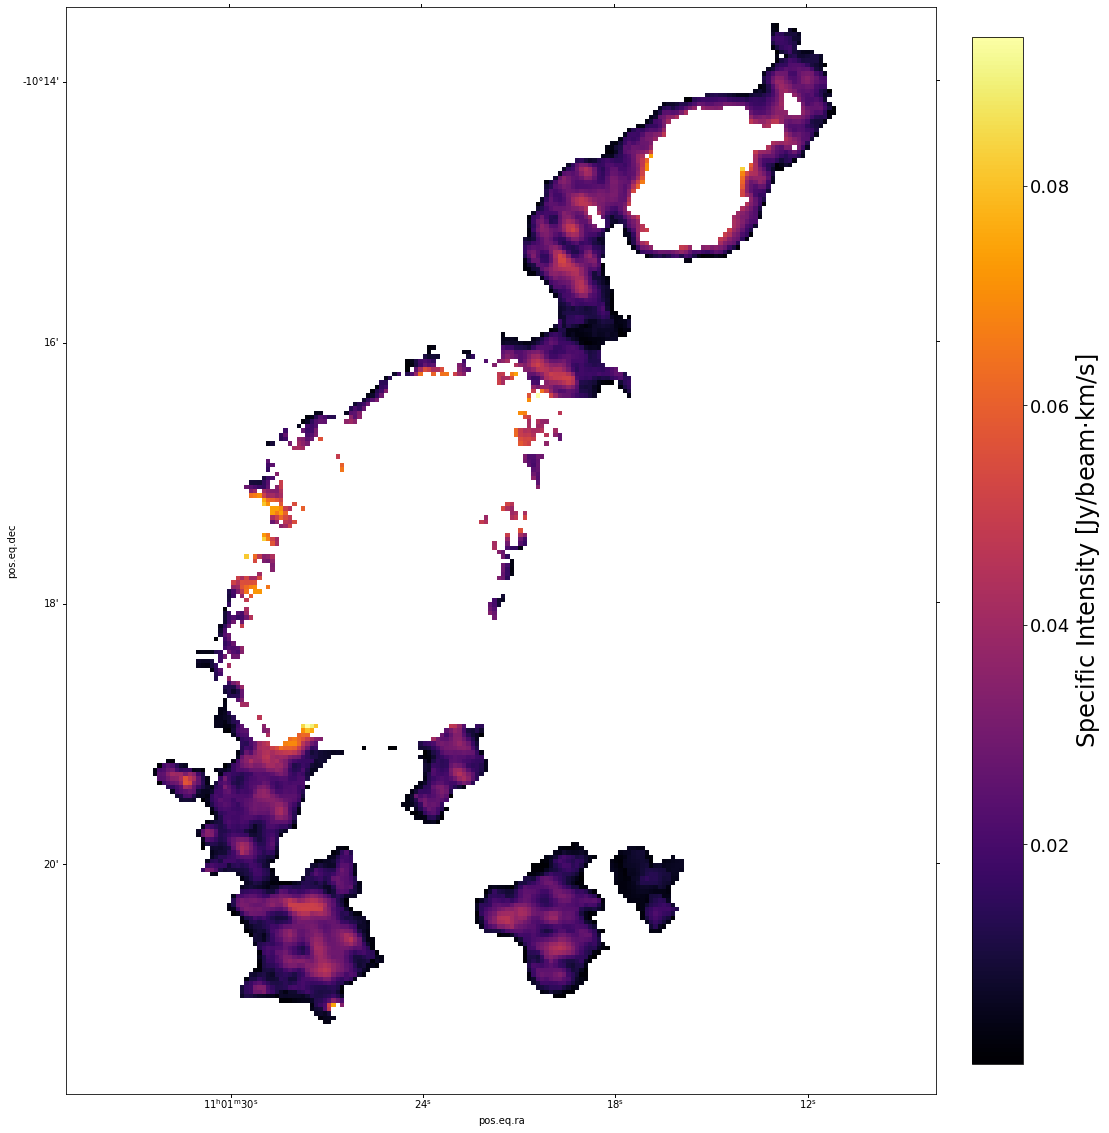

In [66]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0_S1237))
im = ax.imshow(anom_copy, cmap = 'inferno')
#ax.contour(S1237_copy, levels=[1.01e-2, 4.74e-2, 8.48e-2, 0.12, 0.16], colors = 'grey')


cbar = plt.colorbar(im,fraction=0.046, pad=0.032)
cbar.set_label(r"Specific Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)


plt.savefig('mom0_anom1.pdf', bbox_inches='tight')

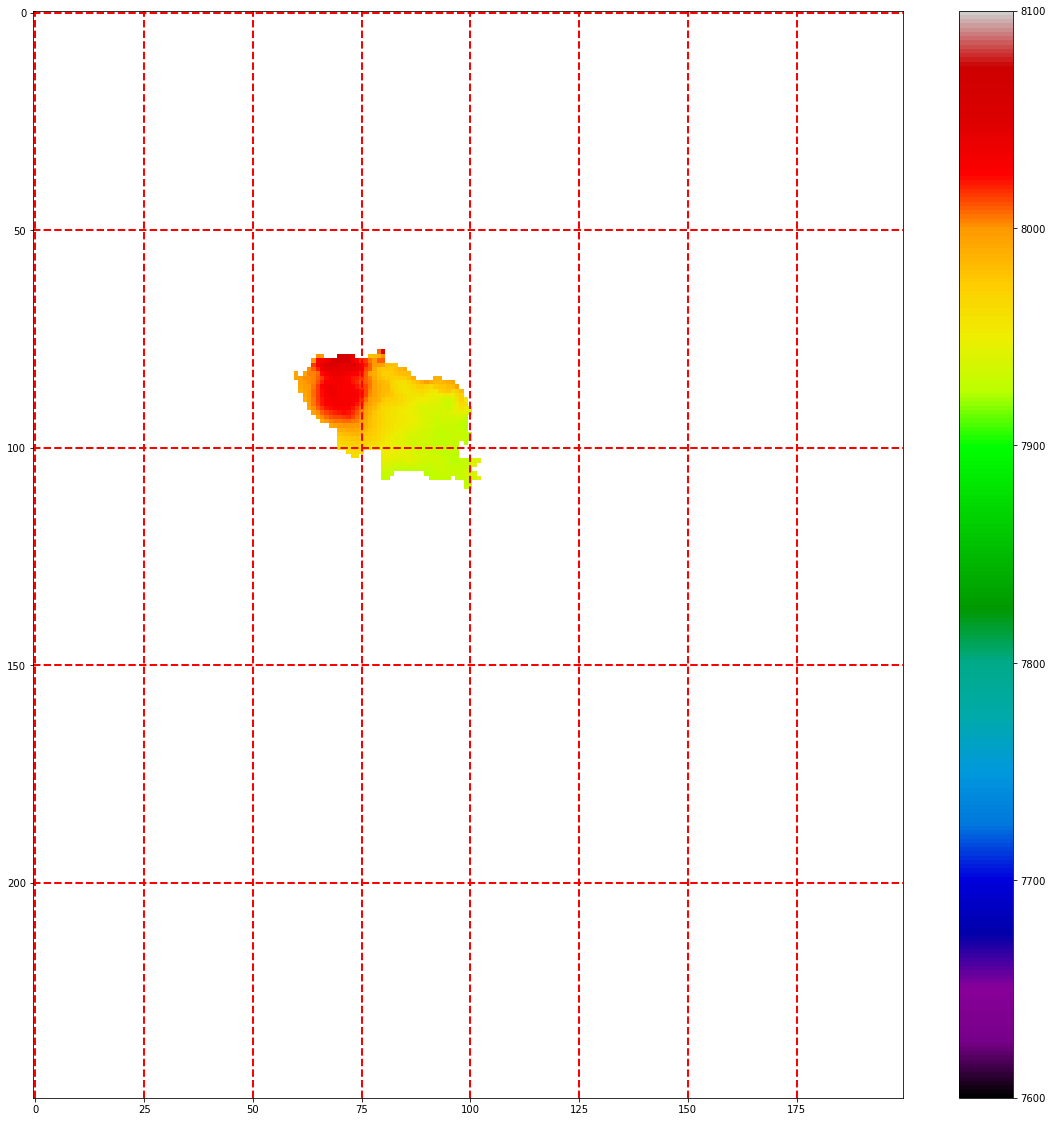

In [18]:
S1_mom1 = np.empty_like(data_mom1_S1237)
S1_mom0 = np.empty_like(data_mom0_S1237)
S1_cube = np.empty_like(data_image_S1237)
S1_model = np.empty_like(data_model_full)
#S1237 = data_mom0[890:1140,950:1150]
#S13 = data_mom0[965:1005,1000:1060] #S1 dims
#S13 = data_mom0[965:1065,970:1070] #S3 dims
#S2 = data_mom0[1080:1140,1070:1130]
#full = [0,250, 0, 200]
#S3 = [75,175,20,120]
#S1 = [75,115, 50, 110]
#S2 = [190, 250, 120, 180]

for i in range(0,200):
    for j in range(0,250): 
        
        S1_mom0[j,i] = 0.0
        S1_mom1[j,i] = math.nan
        for k in range(0,189):
            S1_cube[k,j,i] = 0.0
            S1_model[k,j,i] = 0.0
            
        if i >= 50 and j < 115 and i < 110 and j >= 75:
            S1_mom0[j,i] = data_mom0_S1[j-75,i-50]
            S1_mom1[j,i] = data_mom1_S1[j-75,i-50]
            for k in range(0,189):
                S1_cube[k,j,i] = data_image_S1[k,j-75,i-50]
                S1_model[k,j,i] = data_model_S1[k,j-75,i-50]
                

                    
                
plt.figure(figsize = (20,20))
plt.imshow(S1_mom1, cmap='nipy_spectral', vmin=7600, vmax=8100)
plt.colorbar()

plt.grid(color='r', linestyle='--', linewidth=2)   

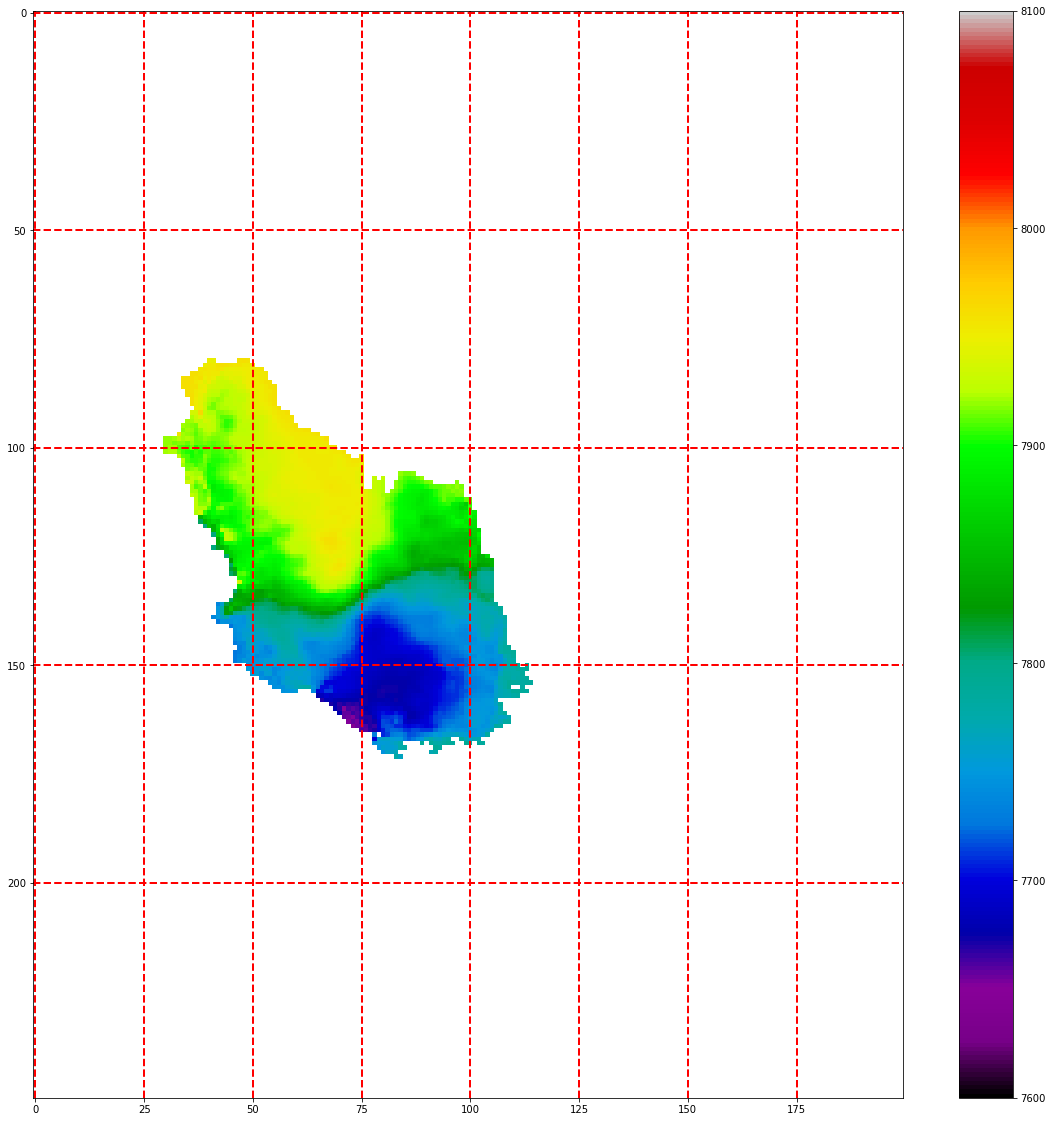

In [20]:
S1_mom1 = np.empty_like(data_mom1_S1237)
S1_mom0 = np.empty_like(data_mom0_S1237)
S1_cube = np.empty_like(data_image_S1237)
S1_model = np.empty_like(data_model_full)
#S1237 = data_mom0[890:1140,950:1150]
#S13 = data_mom0[965:1005,1000:1060] #S1 dims
#S13 = data_mom0[965:1065,970:1070] #S3 dims
#S2 = data_mom0[1080:1140,1070:1130]
#full = [0,250, 0, 200]
#S3 = [75,175,20,120]
#S1 = [75,115, 50, 110]
#S2 = [190, 250, 120, 180]

for i in range(0,200):
    for j in range(0,250): 
        
        S1_mom0[j,i] = 0.0
        S1_mom1[j,i] = math.nan
        for k in range(0,189):
            S1_cube[k,j,i] = 0.0
            S1_model[k,j,i] = 0.0
            
     
                
        if i >= 20 and j < 175 and i < 120 and j >= 75 and S1_mom0[j,i] == 0:
            S1_mom0[j,i] = data_mom0_S3[j-75,i-20]
            S1_mom1[j,i] = data_mom1_S3[j-75,i-20]
            for k in range(0,189):
                S1_cube[k,j,i] = data_image_S3[k,j-75,i-20]
                S1_model[k,j,i] = data_model_S3[k,j-75,i-20]
                
       

                    
                
plt.figure(figsize = (20,20))
plt.imshow(S1_mom1, cmap='nipy_spectral', vmin=7600, vmax=8100)
plt.colorbar()

plt.grid(color='r', linestyle='--', linewidth=2)   

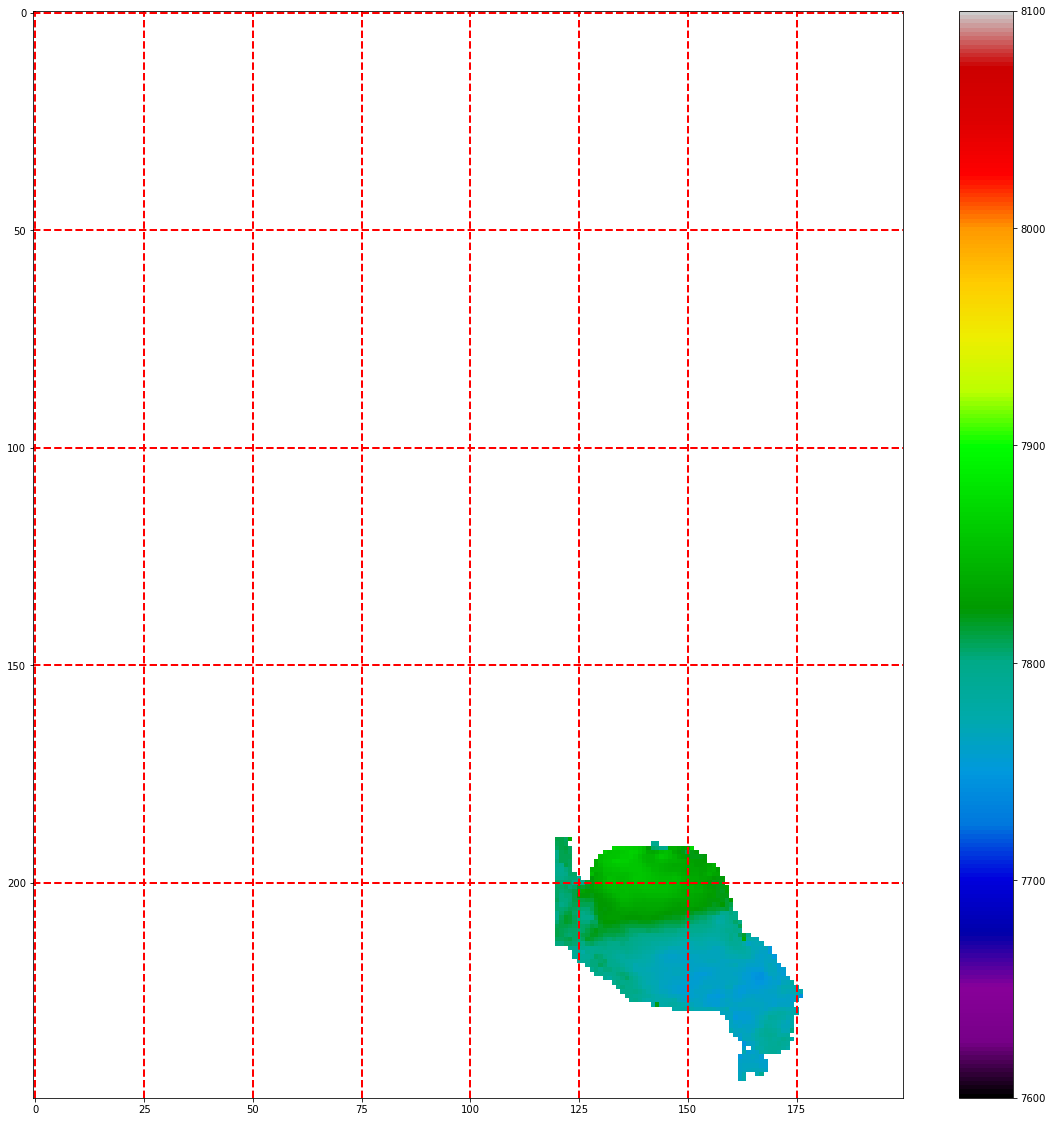

In [45]:
S1_mom1 = np.empty_like(data_mom1_S1237)
S1_mom0 = np.empty_like(data_mom0_S1237)
S1_cube = np.empty_like(data_image_S1237)
S1_model = np.empty_like(data_model_full)
#S1237 = data_mom0[890:1140,950:1150]
#S13 = data_mom0[965:1005,1000:1060] #S1 dims
#S13 = data_mom0[965:1065,970:1070] #S3 dims
#S2 = data_mom0[1080:1140,1070:1130]
#full = [0,250, 0, 200]
#S3 = [75,175,20,120]
#S1 = [75,115, 50, 110]
#S2 = [190, 250, 120, 180]

for i in range(0,200):
    for j in range(0,250): 
        
        S1_mom0[j,i] = 0.0
        S1_mom1[j,i] = math.nan
        for k in range(0,189):
            S1_cube[k,j,i] = 0.0
            S1_model[k,j,i] = 0.0
            
    
                
        if i >= 120 and j < 250 and i < 180 and j>=190 and S1_mom0[j,i] == 0:
            S1_mom0[j,i] = data_mom0_S2[j-190,i-120]
            S1_mom1[j,i] = data_mom1_S2[j-190,i-120]
            for k in range(0,189):
                S1_cube[k,j,i] = data_image_S2[k,j-190,i-120]
                S1_model[k,j,i] = data_model_S2[k,j-190,i-120]
                

                    
                
plt.figure(figsize = (20,20))
plt.imshow(S1_mom1, cmap='nipy_spectral', vmin=7600, vmax=8100)
plt.colorbar()

plt.grid(color='r', linestyle='--', linewidth=2)   

In [47]:
hdu = fits.PrimaryHDU(S1_cube, header=header_image_S1237)
hdu.writeto(outloc+image+'_3D_cube_full_S2'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S1_mom0, header=header_mom0_S1237)
hdu.writeto(outloc+image+'_3D_cube_full_S2_mom0'+ext, overwrite=True)